<a href="https://colab.research.google.com/github/abhi11286/plant-chatbot/blob/main/Plant_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import and Folder Creation
import os

# Create project folder
base = "/content/PlantDocBot"

os.makedirs(os.path.join(base, "data", "plantvillage"), exist_ok=True)
os.makedirs(os.path.join(base, "data", "plantdoc"), exist_ok=True)
os.makedirs(os.path.join(base, "data", "text_corpus"), exist_ok=True)

print("Folders created under", base)

Folders created under /content/PlantDocBot


In [2]:
# Download Dataset via git clone

# PlantVillage dataset
!git clone https://github.com/spMohanty/plantvillage-Dataset.git /content/PlantDocBot/data/plantvillage

# PlantDoc dataset
!git clone https://github.com/pratikkayal/PlantDoc-Dataset.git /content/PlantDocBot/data/plantdoc

Cloning into '/content/PlantDocBot/data/plantvillage'...
remote: Enumerating objects: 163235, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 163235 (delta 2), reused 1 (delta 0), pack-reused 163229 (from 1)
Receiving objects: 100% (163235/163235), 2.00 GiB | 50.46 MiB/s, done.
Resolving deltas: 100% (101/101), done.
Updating files: 100% (182401/182401), done.
Cloning into '/content/PlantDocBot/data/plantdoc'...
remote: Enumerating objects: 2670, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 2670 (delta 22), reused 22 (delta 22), pack-reused 2635 (from 1)
Receiving objects: 100% (2670/2670), 932.92 MiB | 39.80 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (2581/2581), done.


In [3]:
# Verify Dataset directories and list top-level content

import os

for sub in ["plantvillage", "plantdoc"]:
    path = os.path.join(base, "data", sub)
    print(f"\nContents of {sub} :")
    print(os.listdir(path)[:20])   # show first 20 items


Contents of plantvillage :
['slurm-476484.out', 'generate_data_grayscale-40-60.sh', 'generated_for_paper', 'slurm-476480.out', '_generate_data.sh', 'generate_mapstring.py', 'generate_data_color-50-50.sh', 'slurm-476493.out', 'data_distribution_for_SVM', 'generate_data_segmented-80-20.sh', 'raw', 'slurm-476489.out', 'generate_data_segmented-40-60.sh', 'generate_data_color-60-40.sh', 'slurm-476482.out', 'slurm-476488.out', 'utils', 'slurm-476491.out', 'generate_data_segmented-50-50.sh', 'slurm-476481.out']

Contents of plantdoc :
['PlantDoc_Examples.png', 'LICENSE.txt', 'test', 'README.md', '.git', 'train']


In [4]:
# Search for image directories inside PlantVillage
import os

pv_base = os.path.join(base, "data", "plantvillage")
img_exts = ('.jpg', '.jpeg', '.png', '.bmp')

found_dirs = []

for root_dir, dirs, files in os.walk(pv_base):
    count = sum(1 for f in files if f.lower().endswith(img_exts))
    if count > 0:
        found_dirs.append((root_dir, count))

if not found_dirs:
    print("No image files found inside PlantVillage folder.")
else:
    print("Found image directories. Sample list(first 10):")
    for d, c in found_dirs[:10]:
        print("\n", d, " -> ", c, "images")

    # choose first directory as main image root
    img_root = found_dirs[0][0]
    print("\nUsing image root:", img_root)

Found image directories. Sample list(first 10):

 /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/test/35  ->  1103 images

 /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/test/21  ->  204 images

 /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/test/24  ->  899 images

 /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/test/20  ->  224 images

 /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/test/36  ->  78 images

 /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/test/8  ->  233 images

 /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/test/12  ->  232 images

 /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/test/4  ->  229 images

 /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/test/17  ->  21 images

 /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/test/26  ->  193 images

Using image root: /content/PlantDocBot/data/

Displaying color image: /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/test/35/174dd549-6686-4a48-94b3-b8cde8284121.JPG
Original image mode: RGB


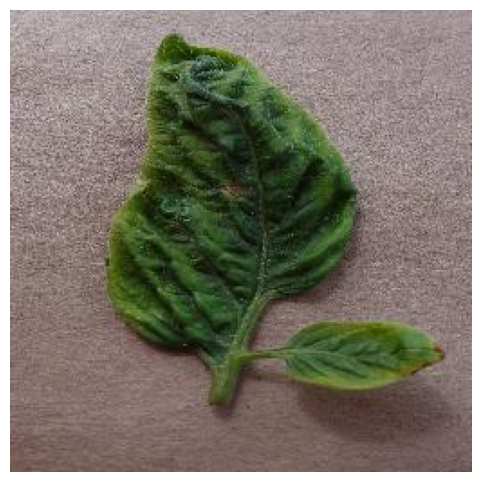

Total images found: 1103
Sample rows:
                                          image_path  \
0  /content/PlantDocBot/data/plantvillage/data_di...   
1  /content/PlantDocBot/data/plantvillage/data_di...   
2  /content/PlantDocBot/data/plantvillage/data_di...   
3  /content/PlantDocBot/data/plantvillage/data_di...   
4  /content/PlantDocBot/data/plantvillage/data_di...   

                                      label  
0  a69b8d1a-c9c8-42b1-b5cf-951c07d1cff7.JPG  
1  39efef4a-0d99-4b16-b038-fb2af849072b.JPG  
2  54e316ad-c110-4e20-b172-4ebd9dd32bdf.JPG  
3  23e1163f-2b40-47a7-bd6f-5d499aa5da74.JPG  
4  cd2d948f-ea4f-4577-9abd-f8ed1ae97f77.JPG  
Saved mapping to: /content/PlantDocBot/data/image_data.csv


In [5]:
# Robust Colour Display
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
import random
import os
import numpy as np

# use img_root from previous cell
if 'img_root' in globals():
    sample_file = None

    for root_dir, dirs, files in os.walk(img_root):
        img_files = [f for f in files if f.lower().endswith(img_exts)]
        if img_files:
            sample_file = os.path.join(root_dir, random.choice(img_files))
            break

    if sample_file:
        print("Displaying color image:", sample_file)
        img = Image.open(sample_file)

        # Check mode
        print("Original image mode:", img.mode)

        # Convert to RGB if needed
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Display using numpy + matplotlib
        plt.figure(figsize=(6, 6))
        plt.imshow(np.asarray(img))
        plt.axis('off')
        plt.show()

    else:
        print("No image found under img_root!")
else:
    print("img_root not found. Run previous cell first.")


import pandas as pd
import os

records = []

if 'img_root' in globals():
    for root_dir, dirs, files in os.walk(img_root):
        for f in files:
            if f.lower().endswith(img_exts):
                path = os.path.join(root_dir, f)

                # label = first folder after img_root
                rel = os.path.relpath(path, img_root)
                label = rel.split(os.sep)[0]

                records.append({"image_path": path, "label": label})

    df = pd.DataFrame(records)
    print("Total images found:", len(df))
    print("Sample rows:")
    print(df.head())

    out_csv = os.path.join(base, "data", "image_data.csv")
    df.to_csv(out_csv, index=False)

    print("Saved mapping to:", out_csv)
else:
    print("img_root not found. Run previous steps first.")

In [6]:
# Verify Dataset directories and list top-level content
for sub in ["plantvillage", "plantdoc"]:
    path = os.path.join(base,"data",sub)
    print("\nContents of", sub, ":")
    print(os.listdir(path)[:20])


Contents of plantvillage :
['slurm-476484.out', 'generate_data_grayscale-40-60.sh', 'generated_for_paper', 'slurm-476480.out', '_generate_data.sh', 'generate_mapstring.py', 'generate_data_color-50-50.sh', 'slurm-476493.out', 'data_distribution_for_SVM', 'generate_data_segmented-80-20.sh', 'raw', 'slurm-476489.out', 'generate_data_segmented-40-60.sh', 'generate_data_color-60-40.sh', 'slurm-476482.out', 'slurm-476488.out', 'utils', 'slurm-476491.out', 'generate_data_segmented-50-50.sh', 'slurm-476481.out']

Contents of plantdoc :
['PlantDoc_Examples.png', 'LICENSE.txt', 'test', 'README.md', '.git', 'train']
